In [39]:
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from fastai import *
from fastai.vision.all import *
from fastai.tabular.all import *


In [43]:
datasets = pd.read_csv('USA_accident_dataset.csv')
# X = datasets.iloc[:, [2,3]].values
# Y = datasets.iloc[:, 4].values

datasets = datasets.drop(columns=['Start_Time', 'End_Time', 'Timezone', 'Weather_Timestamp',"Severity"])





In [44]:
datasets[datasets.select_dtypes(np.float64).columns] = datasets.select_dtypes(np.float64).astype(np.float32)
datasets[datasets.select_dtypes(np.int64).columns] = datasets.select_dtypes(np.int64).astype(np.int32)
datasets.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207326 entries, 0 to 2207325
Data columns (total 28 columns):
 #   Column              Dtype  
---  ------              -----  
 0   Distance(mi)        float32
 1   City                int32  
 2   County              int32  
 3   State               int32  
 4   Temperature(F)      float32
 5   Wind_Chill(F)       float32
 6   Humidity(%)         float32
 7   Pressure(in)        float32
 8   Visibility(mi)      float32
 9   Wind_Direction      int32  
 10  Wind_Speed(mph)     float32
 11  Precipitation(in)   float32
 12  Weather_Condition   int32  
 13  Amenity             bool   
 14  Bump                bool   
 15  Crossing            bool   
 16  Give_Way            bool   
 17  Junction            bool   
 18  No_Exit             bool   
 19  Railway             bool   
 20  Roundabout          bool   
 21  Station             bool   
 22  Stop                bool   
 23  Traffic_Calming     bool   
 24  Traffic_Signal      bool

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(datasets, test_size=0.3, random_state=42)

In [46]:
col_counts = dict(datasets.count(axis=0))
col_types = {c: d for c, d in dict(datasets.dtypes).items() if col_counts[c] > 1000 and (c != 'Distance(mi)' or c != 'Severity')}

_is_num = lambda x: x in (int, float)

cols_numerical = sorted([col for col, dtp in col_types.items() if _is_num(dtp)])

cols_string = sorted([col for col, dtp in col_types.items() if not _is_num(dtp)])

In [47]:
print(f"NUMERICAL: {cols_numerical}")
print(f"CATEGORICAL: {cols_string}")

NUMERICAL: ['City', 'County', 'State', 'Sunrise_Sunset', 'Weather_Condition', 'Wind_Direction']
CATEGORICAL: ['Amenity', 'Bump', 'Crossing', 'Distance(mi)', 'Give_Way', 'Humidity(%)', 'Junction', 'No_Exit', 'Precipitation(in)', 'Pressure(in)', 'Railway', 'Roundabout', 'Station', 'Stop', 'Temperature(F)', 'Time_Duration(min)', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Visibility(mi)', 'Wind_Chill(F)', 'Wind_Speed(mph)']


In [48]:
procs = [Categorify,FillMissing, Normalize]

cont,cat = cont_cat_split(datasets, 1, dep_var="Distance(mi)")
splits = (list(X_train),list(X_test))
to = TabularPandas(X_test, procs, cols_string, cols_numerical, "Distance(mi)", y_block=RegressionBlock(),
                   splits=splits, inplace=True, reduce_memory=True)

c:\users\ivan\appdata\local\programs\python\python39\lib\site-packages\fastai\tabular\core.py:153: UserWarning: Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.
  warn("Using inplace with splits will trigger a pandas error. Set `pd.options.mode.chained_assignment=None` to avoid it.")


ValueError: invalid literal for int() with base 10: 'Distance(mi)'

In [6]:
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()
# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

In [26]:
print(y)

[[0.02081373]
 [0.00322194]
 [0.00335726]
 ...
 [0.00361502]
 [0.00497468]
 [0.00346036]]


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# from keras.utils import np_utils

# # encode class values as integers
# encoder = LabelEncoder()
# encoder.fit(y)
# encoded_Y = encoder.transform(y)
# # convert integers to dummy variables (i.e. one hot encoded)
# dummy_y = np_utils.to_categorical(encoded_Y)

In [7]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
# # reshape input to be [samples, time steps, features]
# X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
# X_test = np.reshape(X-test, (X_test.shape[0], 1, X_test.shape[1]))

In [29]:
# model = Sequential()
# model.add(Dense(12, input_shape=(6,), activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

# model = Sequential()
# model.add(LSTM(50, input_shape=(27,1), activation='relu'))
# # model.add(LSTM(100))

# model.add(Dense(1))
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
# model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node 
# Since we will be predicting a single number
# model.add(Dense(1, kernel_initializer = 'normal'))

In [10]:
model = Sequential([
    layers.Dense(32, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [26]:
# Compiling the model
# model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.compile(optimizer="RMSProp",
              loss="mean_squared_error", metrics=['accuracy'])

In [27]:
# Fitting the ANN to the Training set
history = model.fit(epochs = 10, x=X_train, y=y_train , validation_data=(X_test, y_test))

# estimator = KerasRegressor(build_fn=model, epochs=100, batch_size=5, verbose=0)

Epoch 1/10
48286/48286 [==============================] - 44s 896us/step - loss: 1.0470 - accuracy: 0.0000e+00 - val_loss: 1.0827 - val_accuracy: 0.0000e+00
Epoch 2/10
48286/48286 [==============================] - 44s 904us/step - loss: 1.0499 - accuracy: 0.0000e+00 - val_loss: 1.1588 - val_accuracy: 0.0000e+00
Epoch 3/10
48286/48286 [==============================] - 43s 894us/step - loss: 1.0750 - accuracy: 0.0000e+00 - val_loss: 0.9566 - val_accuracy: 0.0000e+00
Epoch 4/10
48286/48286 [==============================] - 43s 891us/step - loss: 1.1466 - accuracy: 0.0000e+00 - val_loss: 0.9973 - val_accuracy: 0.0000e+00
Epoch 5/10
48286/48286 [==============================] - 46s 944us/step - loss: 1.1237 - accuracy: 0.0000e+00 - val_loss: 0.9601 - val_accuracy: 0.0000e+00
Epoch 6/10
48286/48286 [==============================] - 44s 907us/step - loss: 1.1419 - accuracy: 0.0000e+00 - val_loss: 1.4749 - val_accuracy: 0.0000e+00
Epoch 7/10
48286/48286 [==============================] - 

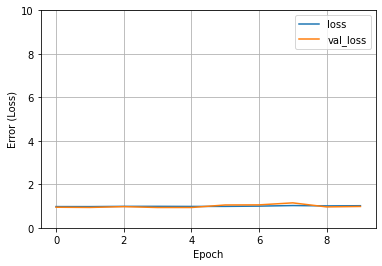

In [17]:
# Function to plot loss
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.grid(True)
########################################################
plot_loss(history)

In [19]:
# Model evaluation on testing dataset
model.evaluate(X_test, y_test)

20694/20694 [==============================] - 11s 518us/step - loss: 0.9812


0.981248140335083

In [25]:
results = model.predict(X_test,verbose =1)
########################################################
print(results)

20694/20694 [==============================] - 9s 445us/step
[[-0.5339856 ]
 [-0.5294614 ]
 [ 0.05937243]
 ...
 [ 0.11679316]
 [ 0.06680393]
 [ 0.54473734]]


In [22]:
# We can decode using the scikit-learn object to get the result
decoded_result = TargetVarScaler.inverse_transform(results.reshape(-1,1))
print(decoded_result)

[[-0.10706351]
 [-0.1002529 ]
 [ 0.7861613 ]
 ...
 [ 0.87260085]
 [ 0.7973485 ]
 [ 1.5168163 ]]
